# Twitter Sentiment Analysis - Oscar

### Scrap data by tweepy API

In [218]:
#！pip install tweepy
#!pip install wordcloud
#!pip install textblob
#!pip install plotly

In [2]:
import tweepy
consumer_key = "QEol1Q74mM83pvTUU0T3y7Jz2"
consumer_secret = "vmYNdrI3TU20btipbfvRmSTYp5LsaoUx9hMBt9Kh8VziZ7Lcgi"
access_token = "1457441520143974401-0j6Pkm3HAXhm0eK7P0JozY3kURqKmL"
access_token_secret = "V7rUOaA63i0RoMBTSDlV5092Wu2ZNOykVI6q6rtTFPxlm"

In [3]:
 # Initializing Tweepy API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 10})
import csv
import tweepy
import re
import io

# Open/create a file to append data to
csvFile = open("Oscars.csv",'a')

#Use csv writer
csvWriter = csv.writer(csvFile)
csvWriter.writerow(['username','time', 'tweet_text'])
for tweet in tweepy.Cursor(api.search_tweets,
                            q = "Oscars",
                            until = "2022-04-27",
                            lang = "en").items(6000):
# Write a row to the CSV file. I use encode UTF-8
        csvWriter.writerow([tweet.user.screen_name,tweet.created_at, tweet.text.encode('utf-8')])
        print ("user_name:",tweet.user.screen_name,
          "Time:",tweet.created_at,"Tweeted:",tweet.text)
csvFile.close()


user_name: TheInSneider Time: 2022-04-26 23:59:54+00:00 Tweeted: Nothing is a lock when it comes to the Oscars, especially these days, but there are two performances I've heard are… https://t.co/PjaMkuNCiJ
user_name: 444mnesiaa Time: 2022-04-26 23:59:25+00:00 Tweeted: RT @uwaisb_: Will Smith's actions at the Oscars sparked more outrage and condemnation than Israel's current war crimes, this world's concep…
user_name: notjeremy_ Time: 2022-04-26 23:59:22+00:00 Tweeted: Amber Heard did a lot more than a slap and something tells me she won’t be banned from the Oscars next year
user_name: RonBro66 Time: 2022-04-26 23:59:04+00:00 Tweeted: RT @PageSix: Will Smith travels to India following Oscars slap controversy https://t.co/kFQESoiLf1 https://t.co/Lmg58FTWEd
user_name: tasmseb Time: 2022-04-26 23:58:58+00:00 Tweeted: rue euphoria http_daddyy 18+ nsfw nsfwfk help write writing essay essay help sugar daddy sugar mommy spoil baby cas… https://t.co/IwDmSzXfnU
user_name: MoofyKitten Time: 2022-

limit_output extension: Maximum message size of 10000 exceeded with 10059 characters

KeyboardInterrupt: 

### Import and Explore data

In [622]:
import pandas as pd
df=pd.read_csv("Oscars0426.csv")

In [623]:
df.drop_duplicates(subset='tweet_text',inplace=True)

In [624]:
df.head()

username                       time  \
0  TheInSneider  2022-04-26 23:59:54+00:00   
1    444mnesiaa  2022-04-26 23:59:25+00:00   
2    notjeremy_  2022-04-26 23:59:22+00:00   
3      RonBro66  2022-04-26 23:59:04+00:00   
4       tasmseb  2022-04-26 23:58:58+00:00   

                                          tweet_text  
0  b"Nothing is a lock when it comes to the Oscar...  
1  b"RT @uwaisb_: Will Smith's actions at the Osc...  
2  b'Amber Heard did a lot more than a slap and s...  
3  b'RT @PageSix: Will Smith travels to India fol...  
4  b'rue euphoria http_daddyy 18+ nsfw nsfwfk hel...

### Data Cleaning

In [625]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('@[^\s]+','',text)
    text = re.sub('RT @[\w_]+:', '', text)
    text = re.sub(r'^b','',text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    text=' '.join(x for x in text.split() if not x.startswith('#'))
    return text
df['tweet_text'] = df['tweet_text'].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yangning/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [626]:
#Replace UTF-8 encoding with single-quotes and ellipsis
df['tweet_text'].replace(to_replace = r'\\xe2\\x80\\x99', value = '\'',  regex = True, inplace = True)
df['tweet_text'].replace(to_replace = r'\\xe2\\x80\\xa6', value = '...', regex = True, inplace = True)
#Remove all other UTF-8 encoding
df['tweet_text'].replace(to_replace = r'\\x[0-9a-fA-F][0-9a-fA-F]', value = '', regex = True, inplace = True)

In [627]:
df.head()

username                       time  \
0  TheInSneider  2022-04-26 23:59:54+00:00   
1    444mnesiaa  2022-04-26 23:59:25+00:00   
2    notjeremy_  2022-04-26 23:59:22+00:00   
3      RonBro66  2022-04-26 23:59:04+00:00   
4       tasmseb  2022-04-26 23:58:58+00:00   

                                          tweet_text  
0  noth lock come oscar especi day two perform iv...  
1  rt uwaisb smith action oscar spark outrag cond...  
2  amber heard lot slap someth tell ban oscar nex...  
3  rt pagesix smith travel india follow oscar sla...  
4  rue euphoria nsfw nsfwfk help write write essa...

### Create sentimnet features by `SentimentIntensityAnalyzer`

In [628]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
df[['polarity', 'subjectivity']] = df["tweet_text"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in df["tweet_text"].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
            df.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "positive"
    else:
        df.loc[index, 'sentiment'] = "neutral"
    df.loc[index, 'Negative'] = neg
    df.loc[index, 'Neutral'] = neu
    df.loc[index, 'Positive'] = pos
    df.loc[index, 'compound'] = comp
df.head(10)
        

username                       time  \
0     TheInSneider  2022-04-26 23:59:54+00:00   
1       444mnesiaa  2022-04-26 23:59:25+00:00   
2       notjeremy_  2022-04-26 23:59:22+00:00   
3         RonBro66  2022-04-26 23:59:04+00:00   
4          tasmseb  2022-04-26 23:58:58+00:00   
5      MoofyKitten  2022-04-26 23:58:54+00:00   
6   DannyPerez1438  2022-04-26 23:58:52+00:00   
7     user45761827  2022-04-26 23:58:43+00:00   
8       BHPReviews  2022-04-26 23:57:52+00:00   
9  TammyBr48675861  2022-04-26 23:57:34+00:00   

                                          tweet_text  polarity  subjectivity  \
0  noth lock come oscar especi day two perform iv...      0.00          0.00   
1  rt uwaisb smith action oscar spark outrag cond...      0.05          0.25   
2  amber heard lot slap someth tell ban oscar nex...      0.00          0.00   
3  rt pagesix smith travel india follow oscar sla...      0.00          0.00   
4  rue euphoria nsfw nsfwfk help write write essa...      0.00          0.00   
5  much like oscar slap bullshit tire hear johnni...      0.20          0.20   
6  rt erikdavi note cinemacon present n acrossthe...      0.00          0.05   
7                                   come sweep oscar      0.00          0.00   
8            rt cassanovahefn slap better oscar hand      0.50          0.50   
9  realbrysongray cmi yeah didnt angelina joli dr...      0.00          0.00   

  sentiment  Negative  Neutral  Positive  compound  
0   neutral     0.000    1.000     0.000    0.0000  
1  negative     0.478    0.431     0.091   -0.8442  
2  negative     0.273    0.606     0.121   -0.4588  
3  positive     0.000    0.833     0.167    0.1531  
4  positive     0.000    0.573     0.427    0.8658  
5  negative     0.342    0.360     0.297   -0.4588  
6  positive     0.000    0.725     0.275    0.5859  
7   neutral     0.000    1.000     0.000    0.0000  
8  positive     0.000    0.280     0.720    0.7717  
9  positive     0.000    0.820     0.180    0.2960

In [629]:
df1 = df[["tweet_text", "Positive", "Negative", "Neutral"]]
x = sum(df1["Positive"])
y = sum(df1["Negative"])
z = sum(df1["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [630]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  338.78500000000065
Negative:  119.99999999999996
Neutral:  1662.213000000004


### PieCart on Sentiments scores

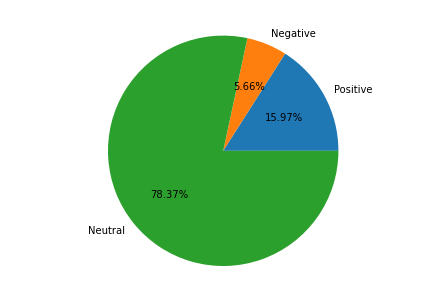

In [631]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Positive', 'Negative', 'Neutral']
senti_value = [x,y,z]
ax.pie(senti_value, labels = langs,autopct='%1.2f%%')
plt.show()

In [632]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(df,"sentiment")

Total  Percentage
positive   1041       49.06
neutral     752       35.44
negative    329       15.50

### Wordcloud

In [633]:
def create_wordcloud(text):
    mask = np.array(Image.open('cloud.png'))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white',
    mask = mask,
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file('wc.png')
    print('Word Cloud Saved Successfully')
    path='wc.png'
    display(Image.open(path))

####  Wordcloud for all tweets

Word Cloud Saved Successfully


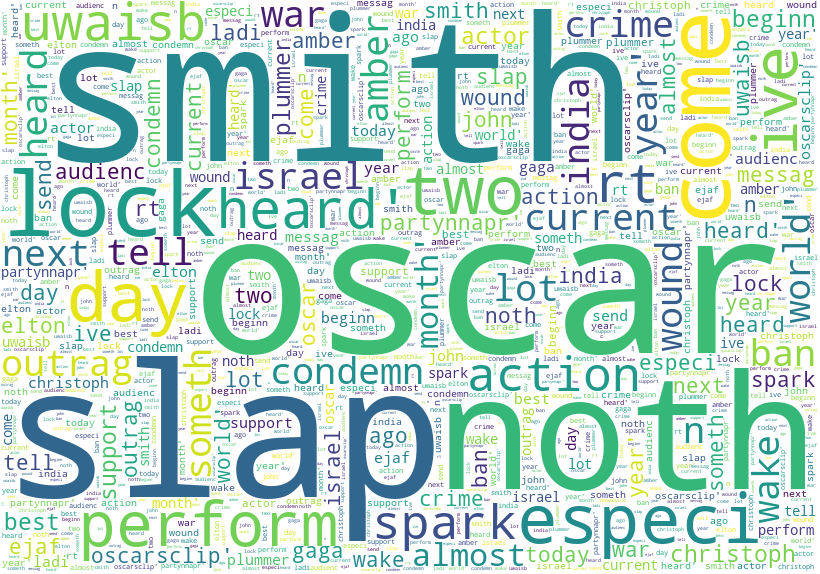

In [634]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
#Creating wordcloud for all tweets
create_wordcloud(df1['tweet_text'].values)

#### Wordcloud for negative tweets

In [648]:
tw_list_negative = df[df["sentiment"]=="negative"]
tw_list_positive = df[df["sentiment"]=="positive"]
tw_list_neutral = df[df["sentiment"]=="neutral"]

Word Cloud Saved Successfully


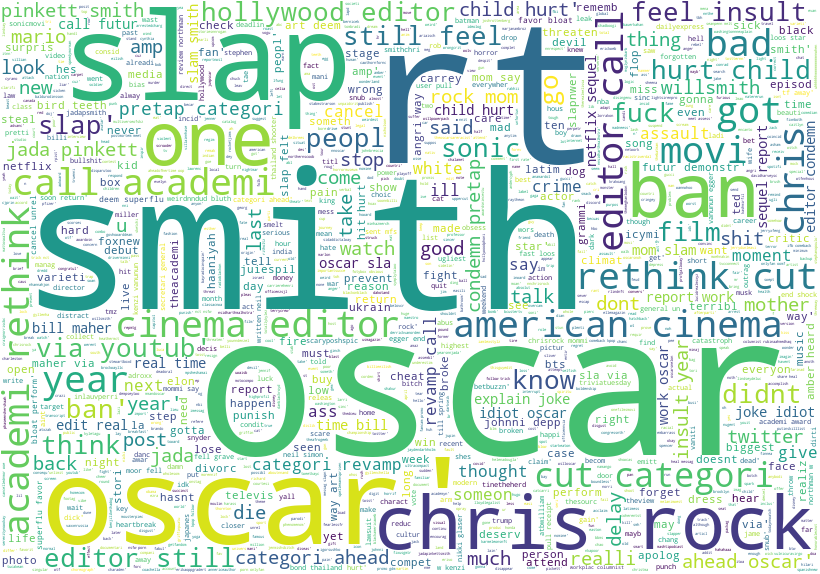

In [650]:
#Creating wordcloud for negative tweets
create_wordcloud(tw_list_negative['tweet_text'].values)

#### Wordcloud for positive tweets

Word Cloud Saved Successfully


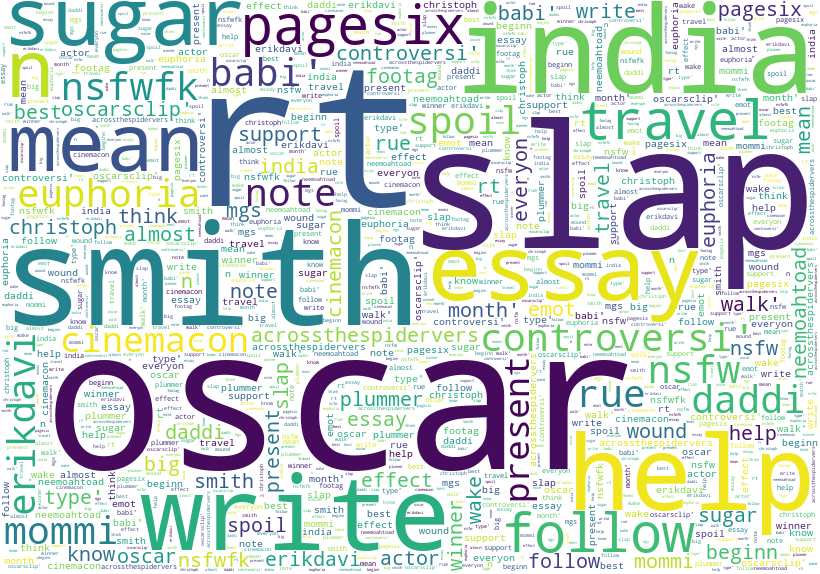

In [651]:
#Creating wordcloud for positive tweets
create_wordcloud(tw_list_positive['tweet_text'].values)

#### Wordcloud for neutral tweets

Word Cloud Saved Successfully


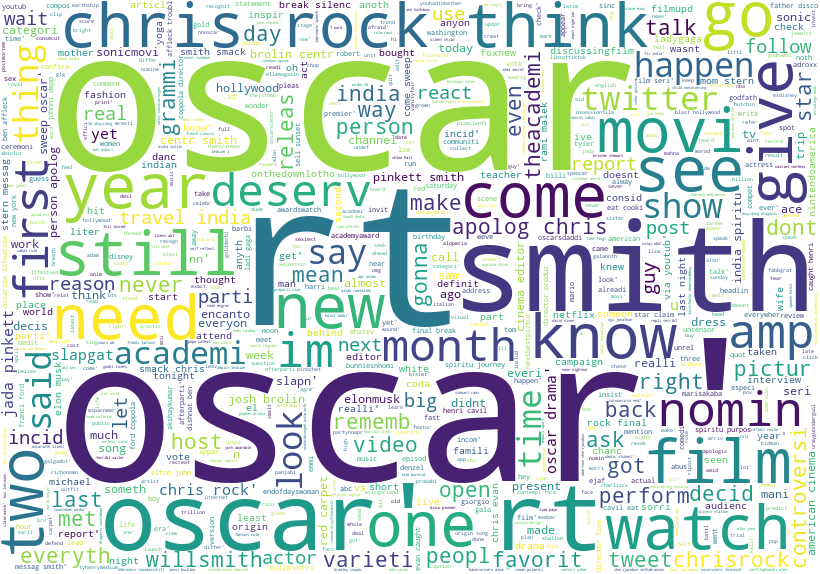

In [652]:
create_wordcloud(tw_list_neutral['tweet_text'].values)

### Sentiment by hour

In [637]:
df2=df
df2["id"] = df2.index + 1
df2['time'] = pd.to_datetime(df2['time'], errors='coerce')
df2['time_hour'] = df2['time'].dt.round('H')
aggregation = {'count': ('id','count')}

df_sentiment_by_time = df2.groupby(['time_hour', 'sentiment']).agg(**aggregation).reset_index()
df_sentiment_by_time

time_hour sentiment  count
0  2022-04-26 00:00:00+00:00  negative      7
1  2022-04-26 00:00:00+00:00   neutral     16
2  2022-04-26 00:00:00+00:00  positive     27
3  2022-04-26 01:00:00+00:00  negative     20
4  2022-04-26 01:00:00+00:00   neutral     32
..                       ...       ...    ...
70 2022-04-26 23:00:00+00:00   neutral     20
71 2022-04-26 23:00:00+00:00  positive     45
72 2022-04-27 00:00:00+00:00  negative     11
73 2022-04-27 00:00:00+00:00   neutral     39
74 2022-04-27 00:00:00+00:00  positive     21

[75 rows x 3 columns]

In [639]:
import plotly.io as pio
pio.renderers.default='notebook'
import plotly.express as px
fig = px.line(df_sentiment_by_time, x="time_hour", y="count", color="sentiment",title="Sentiment by the hour of day")
fig.show()

### Countvectorizer- Top 10 words

In [641]:
df_token=df2
#Appliyng Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
countVector = countVectorizer.fit_transform(df_token['tweet_text'])
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())

# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[0:11]

0
oscar  1439
rt      640
smith   404
slap    352
chri    267
rock    211
best    124
like    110
movi    109
year    106
one     104

### Bag of Words

In [640]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(df_token['tweet_text'],(2,2),20)
n2_bigrams

[('chris rock', 189),
 ('oscar slap', 183),
 ('rock oscar', 81),
 ('smith slap', 70),
 ('smith oscar', 52),
 ('apolog chris', 52),
 ('travel india', 49),
 ('person apolog', 43),
 ('smith person', 41),
 ('slap chris', 40),
 ('smith travel', 38),
 ('win oscar', 36),
 ('rock mom', 36),
 ('month oscar', 34),
 ('chris mom', 33),
 ('slap report', 31),
 ('india spiritu', 30),
 ('slap son', 29),
 ('oscar year', 27),
 ('follow oscar', 26)]

In [573]:
#n3_trigram
n3_trigrams = get_top_n_gram(df2['tweet_text'],(3,3),20)
n3_trigrams

[('chris rock oscar', 80),
 ('apolog chris rock', 52),
 ('rock oscar slap', 48),
 ('person apolog chris', 43),
 ('smith person apolog', 40),
 ('smith travel india', 36),
 ('chris rock mom', 35),
 ('oscar slap report', 31),
 ('smith slap son', 29),
 ('slap chris rock', 28),
 ('slap son oscar', 26),
 ('american cinema editor', 25),
 ('month oscar slap', 24),
 ('travel india spiritu', 24),
 ('smith slap chris', 23),
 ('india spiritu purpos', 23),
 ('follow oscar slap', 22),
 ('jada pinkett smith', 21),
 ('practic yoga medit', 19),
 ('spiritu purpos month', 18)]